In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, save
import plotly.graph_objects as go
import sklearn
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()

In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
all_data=pd.concat([train_df,test_df],axis=0)
all_data.reset_index(drop=True)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId
0,1.0,NaN,Afghanistan,2020-01-22,0.0,0.0,NaN
1,2.0,NaN,Afghanistan,2020-01-23,0.0,0.0,NaN
2,3.0,NaN,Afghanistan,2020-01-24,0.0,0.0,NaN
3,4.0,NaN,Afghanistan,2020-01-25,0.0,0.0,NaN
4,5.0,NaN,Afghanistan,2020-01-26,0.0,0.0,NaN
...,...,...,...,...,...,...,...
32335,NaN,NaN,Zimbabwe,2020-04-26,NaN,NaN,12638.0
32336,NaN,NaN,Zimbabwe,2020-04-27,NaN,NaN,12639.0
32337,NaN,NaN,Zimbabwe,2020-04-28,NaN,NaN,12640.0
32338,NaN,NaN,Zimbabwe,2020-04-29,NaN,NaN,12641.0


In [4]:
train_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19698 entries, 0 to 19697
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              19698 non-null  int64  
 1   Province_State  8375 non-null   object 
 2   Country_Region  19698 non-null  object 
 3   Date            19698 non-null  object 
 4   ConfirmedCases  19698 non-null  float64
 5   Fatalities      19698 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 923.5+ KB


In [6]:
train_df['Country_Region'].nunique()

173

So, according to this dataset, we are analyzing 173 countries which are affected by Corona.

In [7]:
print("fill blanks and add region for counting")

train_df.drop('Province_State',axis=1,inplace=True)

fill blanks and add region for counting


Out of 173 countries data, we have only 8 countries who has given Province wise data for Corona confirmed and fatalities. Hence, alot of this missing data would not be good for our dataset, and hence we will drop this column.

In [8]:
# Resetting Date column into Datetime object and making it an index of dataframe
train_df['Date']=pd.to_datetime(train_df['Date'])
train_df.set_index('Date',inplace=True)

# Exploratory Data Analysis
Qs1. Which countries has high number of cases?

Qs2. How is confirmed cases increases by day?

Qs3. What is fatality rate of confirmed cases?

Qs4. How is cases increasing by day of 1st reported case?

Qs5. Understanding data of India and comparing it with the world?

Qs6. What is new rate of increase per case per day?

*Note*: My Analysis is limited to 12 Countries of interest for better understanding the spread while I will try to extend this to other countries and make Predictions of Confirmed Cases and Fatalities.

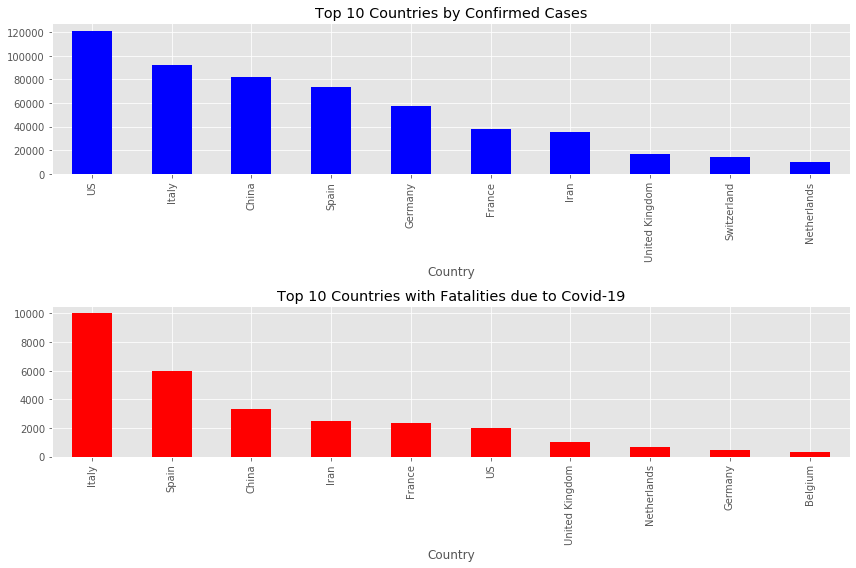

In [9]:
pivot=pd.pivot_table(train_df,columns='Country_Region',index='Date',values='ConfirmedCases',aggfunc=np.sum)
pivot_fatality=pd.pivot_table(train_df,columns='Country_Region',index='Date',values='Fatalities',aggfunc=np.sum)
country_list=[]
value_list=[]
fatality_list=[]
for country in list(pivot.columns):
    country_list.append(country)
    value_list.append(pivot[country].max())
    fatality_list.append(pivot_fatality[country].max())
    new_dict={'Country':country_list,'Confirmed':value_list,'Fatality':fatality_list}
df=pd.DataFrame.from_dict(new_dict)
df.set_index('Country',inplace=True)

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
df['Confirmed'].sort_values(ascending=False)[:10].plot(kind='bar',color='blue')
plt.title('Top 10 Countries by Confirmed Cases')
plt.subplot(2,1,2)
df['Fatality'].sort_values(ascending=False)[:10].plot(kind='bar',color='red')
plt.title('Top 10 Countries with Fatalities due to Covid-19')
plt.tight_layout()

In [10]:
top_confirmed=df.sort_values(by='Confirmed',ascending=False)[:10]

In [11]:
# Make List of Top 10 Countries and India and Netherlands- The Countries of interest.
list_countries=list(top_confirmed.index)
list_countries.append('India')
list_countries.append('Netherlands')

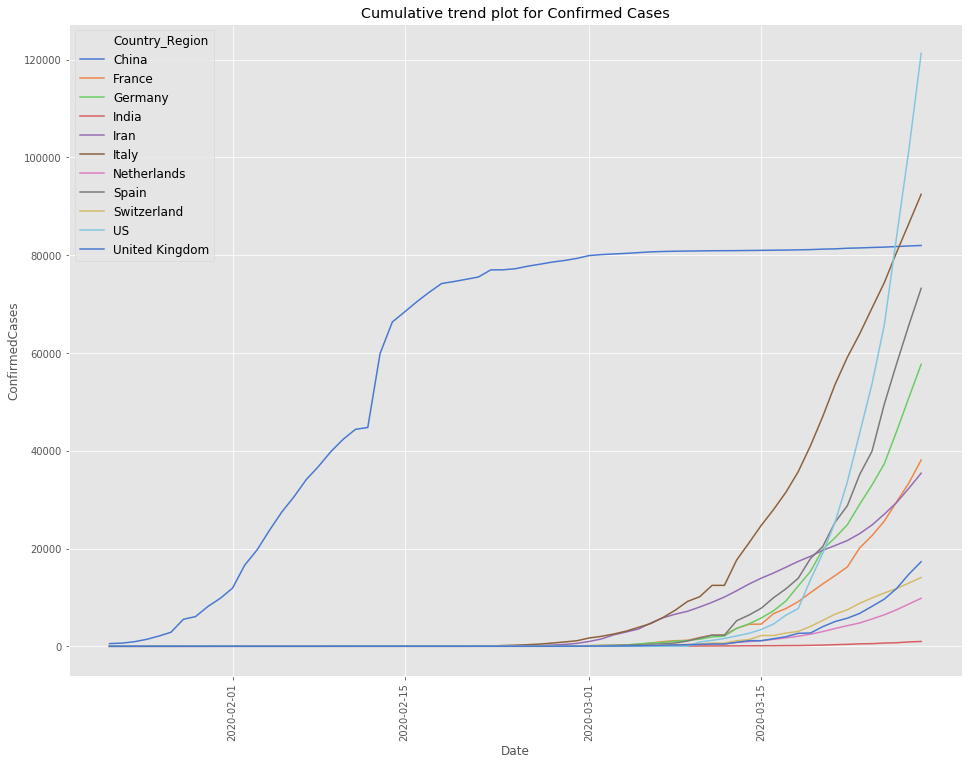

In [12]:
times_series_cntr = train_df.groupby(['Date','Country_Region'])['ConfirmedCases'].sum()\
                    .reset_index().set_index('Date')
df_countries_tm = times_series_cntr[times_series_cntr['Country_Region'].isin(list_countries)]


plt.figure(figsize=(16,12))
ax = sns.lineplot(x=df_countries_tm.index, y="ConfirmedCases", hue="Country_Region", data=df_countries_tm,palette='muted').set_title('Cumulative line')
plt.legend(loc=2, prop={'size': 12})
plt.title('Cumulative trend plot for Confirmed Cases')
plt.xticks(rotation=90);

1. We can see that China has stabilized its new case reporting while all other countries are showing increase in trend.
2. There is huge variance in dates from when there has been sudden increase in cases.
3. In case of South Korea, their data indicates that , they realized and understood the pattern quite soon enough, and been able to cap increasing trend.
4. India has very low number of confirmed reports till 22 March 2020.


In [13]:
Confirm_pivot=pd.pivot_table(train_df,index='Date',columns='Country_Region',
                             values='ConfirmedCases',aggfunc=np.sum)

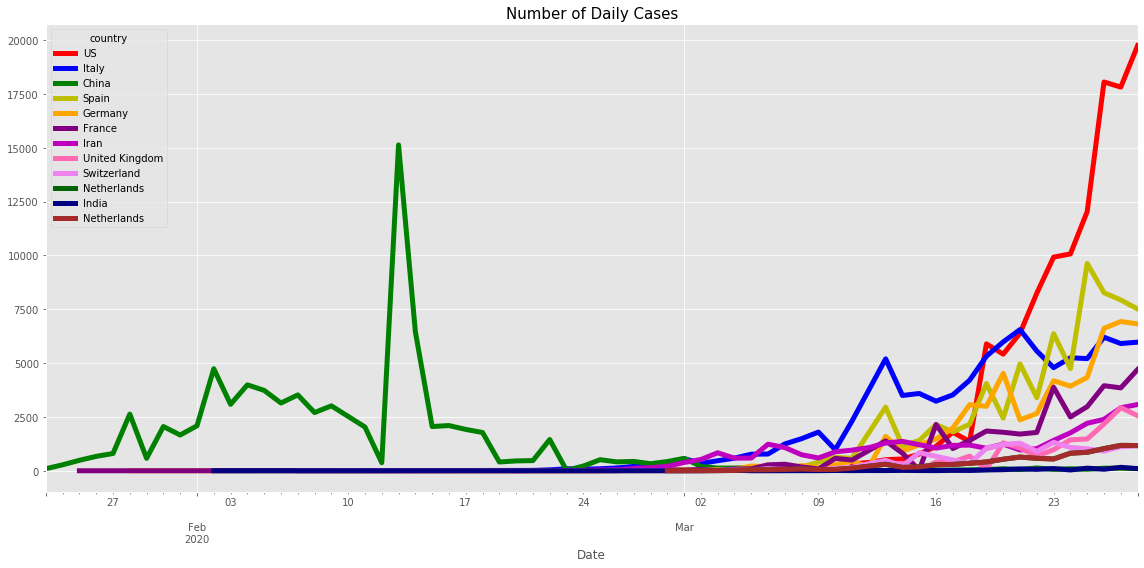

In [14]:
plt.figure(figsize=(16,8))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0)
    Confirm=Confirm[Confirm>0]
    Confirm.plot(color=colors[i],label=country,markersize=12,lw=5)    
    plt.title('Number of Daily Cases',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()

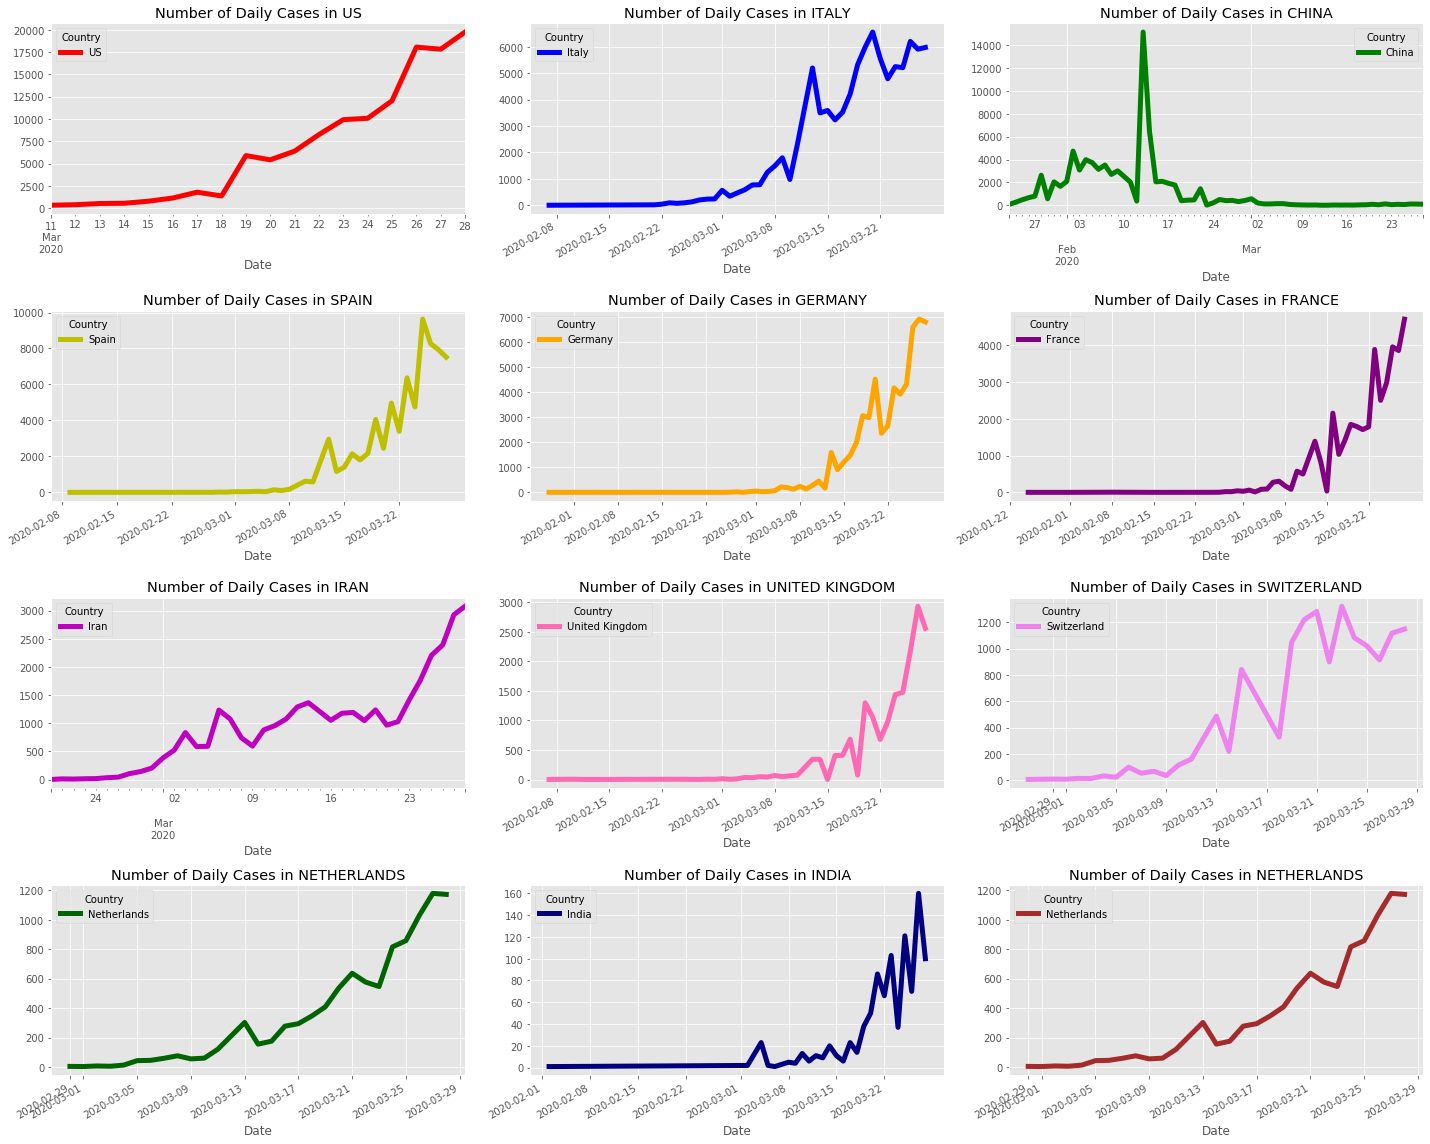

In [15]:
plt.figure(figsize=(20,16))
colors=['r','b','g','y','orange','purple','m','hotpink','violet','darkgreen','navy','brown']
for i,country in enumerate(list_countries):
    Confirm=Confirm_pivot[Confirm_pivot[country]>0][country].diff().fillna(0)
    Confirm=Confirm[Confirm>0]
    
    plt.subplot(4,3,i+1)
    Confirm.plot(color=colors[i],label=country,markersize=12,lw=5)    
    plt.xticks()
    plt.legend(title='Country')
    plt.title('Number of Daily Cases in {}'.format(country.upper()))
plt.tight_layout()

In [16]:
for country in list_countries:
    id_max=Confirm_pivot[country].diff().fillna(0).idxmax()
    maxim=Confirm_pivot[country].diff().fillna(0).max()
    print('Maximum New Cases registered for {0} was {1} on {2}'.format(country,maxim,id_max))

Maximum New Cases registered for US was 19746.0 on 2020-03-28 00:00:00
Maximum New Cases registered for Italy was 6557.0 on 2020-03-21 00:00:00
Maximum New Cases registered for China was 15136.0 on 2020-02-13 00:00:00
Maximum New Cases registered for Spain was 9630.0 on 2020-03-25 00:00:00
Maximum New Cases registered for Germany was 6933.0 on 2020-03-27 00:00:00
Maximum New Cases registered for France was 4703.0 on 2020-03-28 00:00:00
Maximum New Cases registered for Iran was 3076.0 on 2020-03-28 00:00:00
Maximum New Cases registered for United Kingdom was 2933.0 on 2020-03-27 00:00:00
Maximum New Cases registered for Switzerland was 1321.0 on 2020-03-23 00:00:00
Maximum New Cases registered for Netherlands was 1179.0 on 2020-03-27 00:00:00
Maximum New Cases registered for India was 160.0 on 2020-03-27 00:00:00
Maximum New Cases registered for Netherlands was 1179.0 on 2020-03-27 00:00:00


In [17]:
Fatal_pivot=pd.pivot_table(train_df,index='Date',columns='Country_Region',values='Fatalities',aggfunc=np.sum)

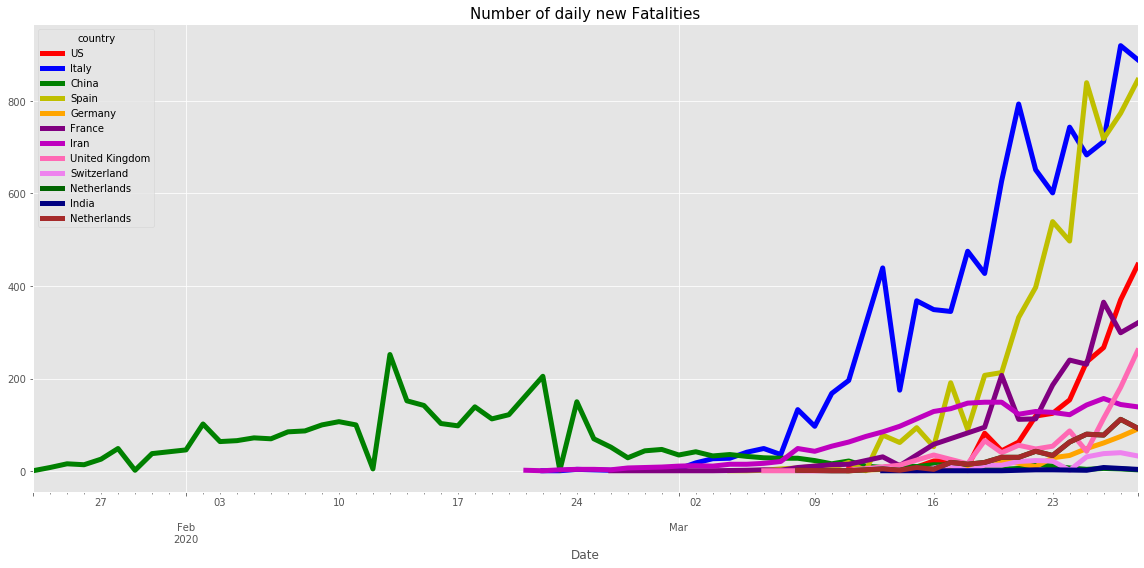

In [18]:
plt.figure(figsize=(16,8))
for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[(Fatal_pivot[country]>0)][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
    Fatal_diff.plot(color=colors[i],label=country,lw=5)
    plt.title('Number of daily new Fatalities',fontsize=15)
    plt.legend(title='country')
plt.tight_layout()

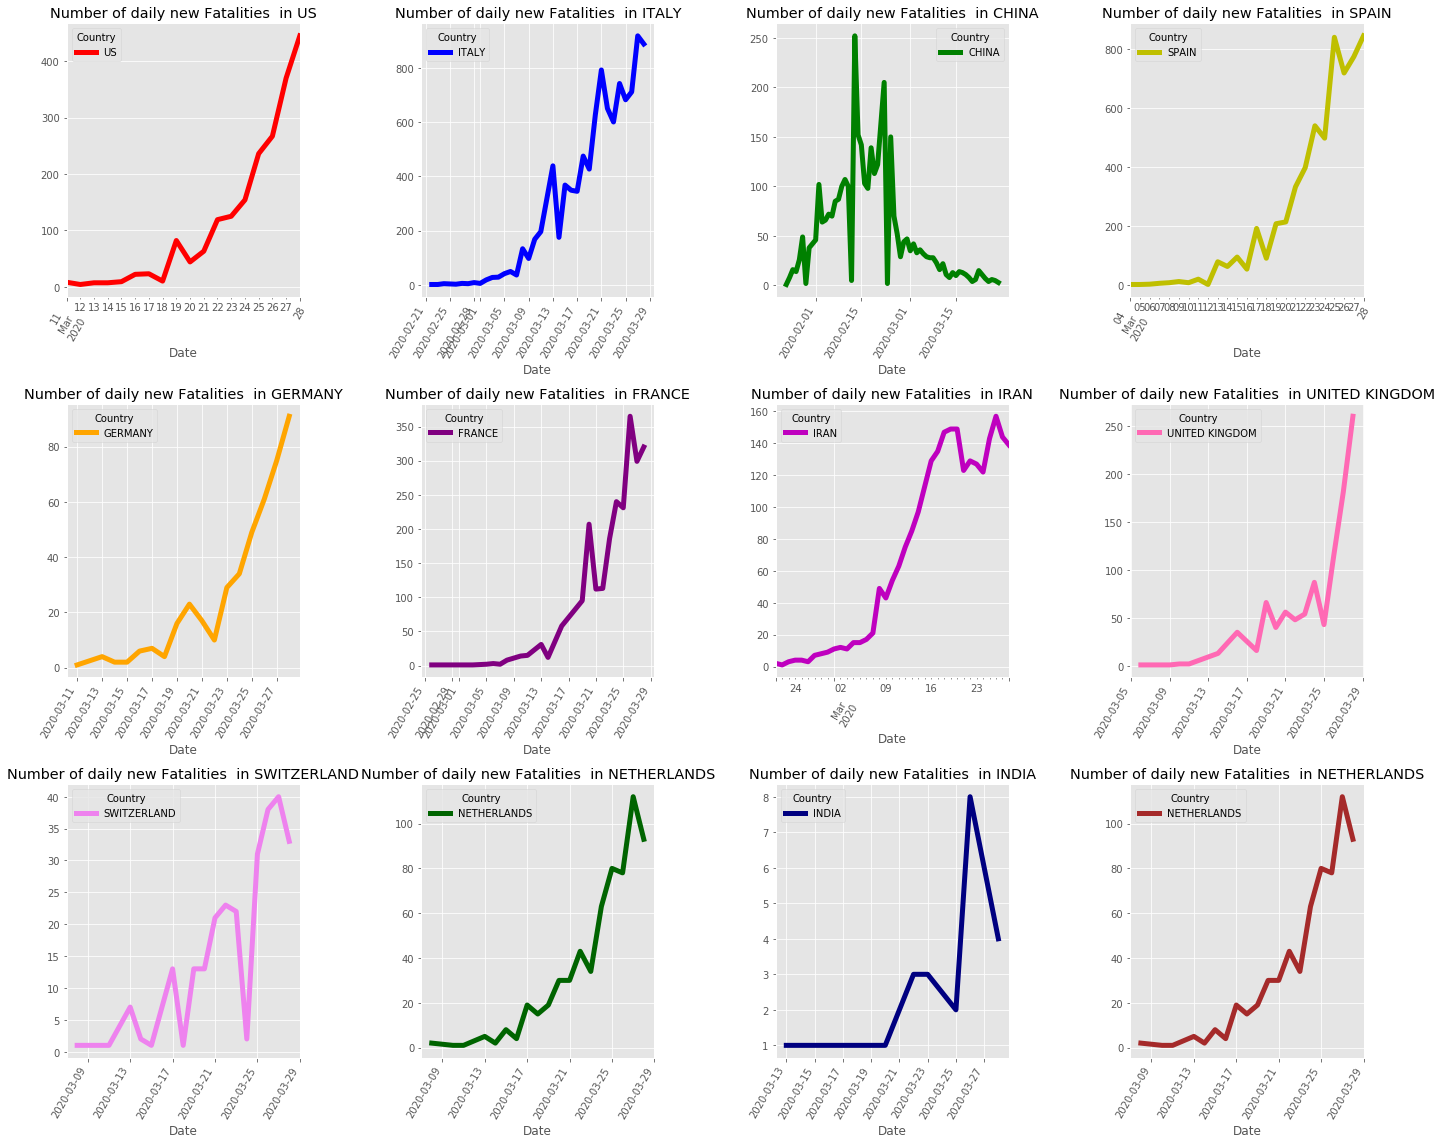

In [19]:
plt.figure(figsize=(20,16))
for i,country in enumerate(list_countries):
    Fatal_diff=Fatal_pivot[(Fatal_pivot[country]>0)][country].diff().fillna(0)
    Fatal_diff=Fatal_diff[Fatal_diff>0]
    plt.subplot(3,4,i+1)
    Fatal_diff.plot(color=colors[i],label=country.upper(),lw=5)
    plt.xticks(rotation=60)
    plt.title('Number of daily new Fatalities  in {}'.format(country.upper()))
    plt.legend(title='Country')
plt.tight_layout()


Text(0.5, 0.98, 'Variation in number of confirmed cases on daily basis')

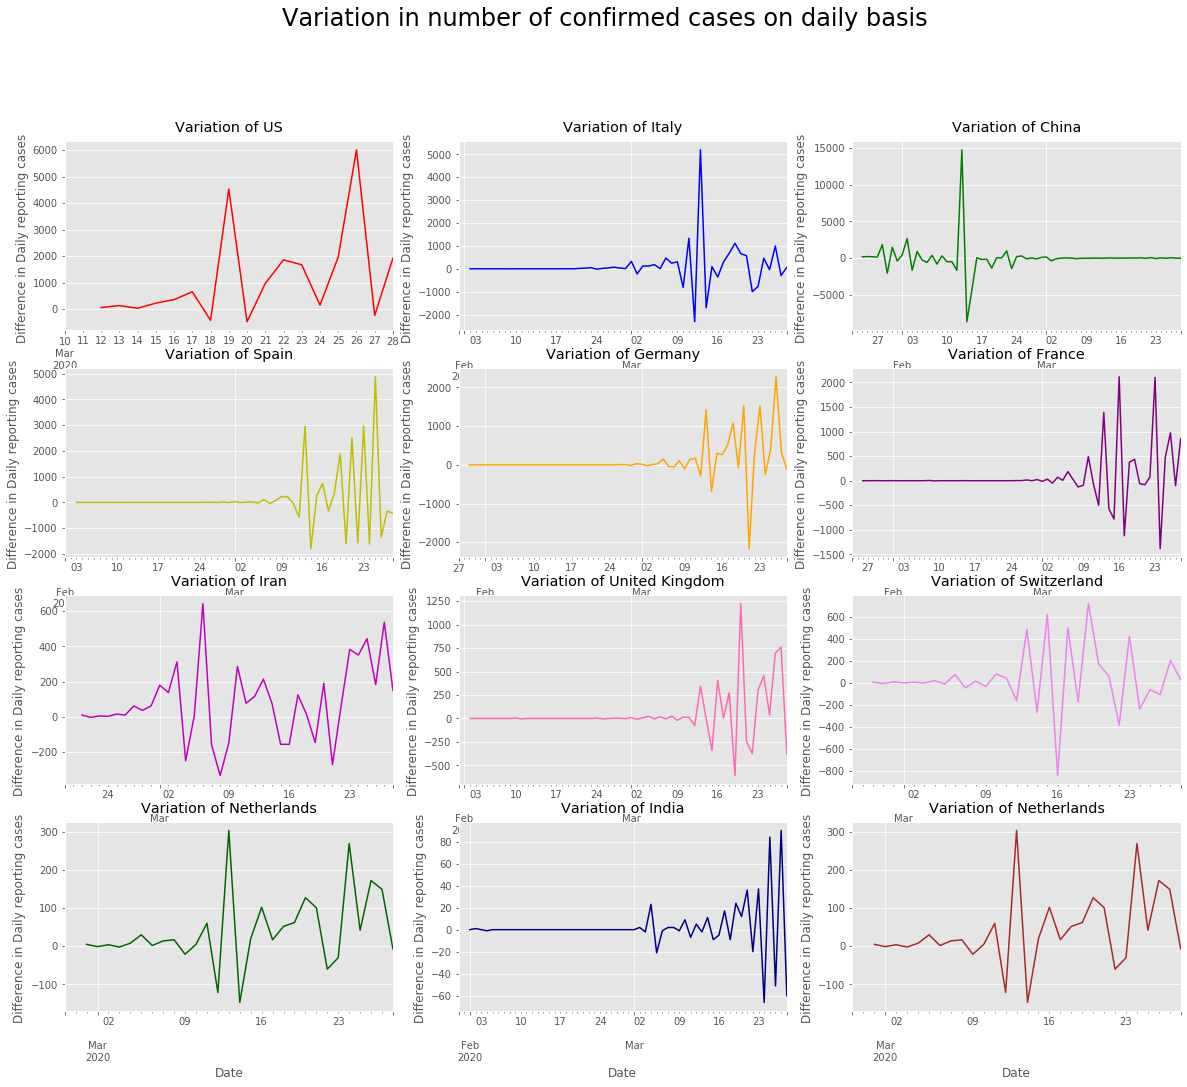

In [20]:
# Understanding New cases confirmation variations on daily basis
plt.figure(figsize=(20,16))
for i,country in enumerate(list_countries):
    plt.subplot(4,3,i+1)
    train_df[(train_df['Country_Region']==country)&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().diff().diff().plot(color=colors[i])
    plt.ylabel('Difference in Daily reporting cases ')
    plt.title('Variation of {}'.format(country),va='bottom')
plt.suptitle('Variation in number of confirmed cases on daily basis',fontsize=24,va='baseline')

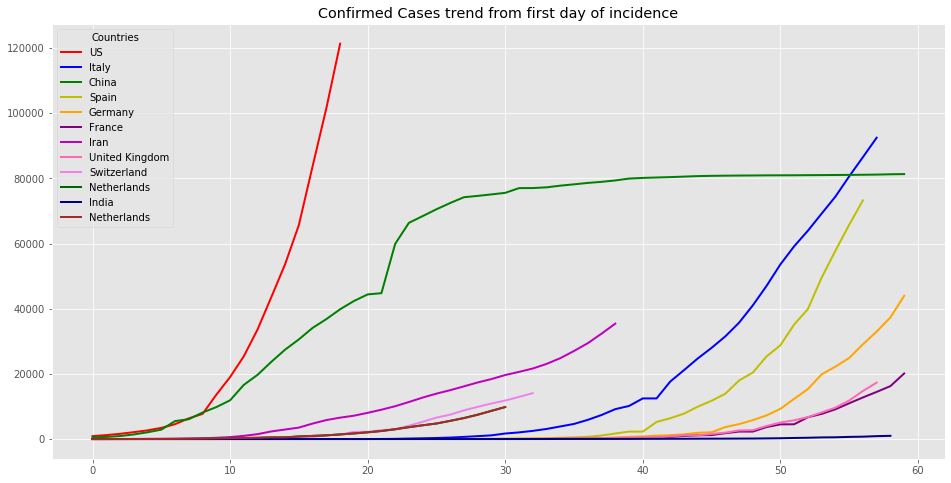

In [21]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases trend from first day of incidence')
for i,country in enumerate(list_countries):
    confirm_group=train_df[(train_df['Country_Region']==country)&train_df['ConfirmedCases']!=0].groupby('Date').agg({'ConfirmedCases':['sum']})
    confirm_value=[j for j in confirm_group.ConfirmedCases['sum'].values]
    plot_value=confirm_value[0:60]
    plt.plot(plot_value,color=colors[i],label=country,lw=2)
    plt.legend(title='Countries')

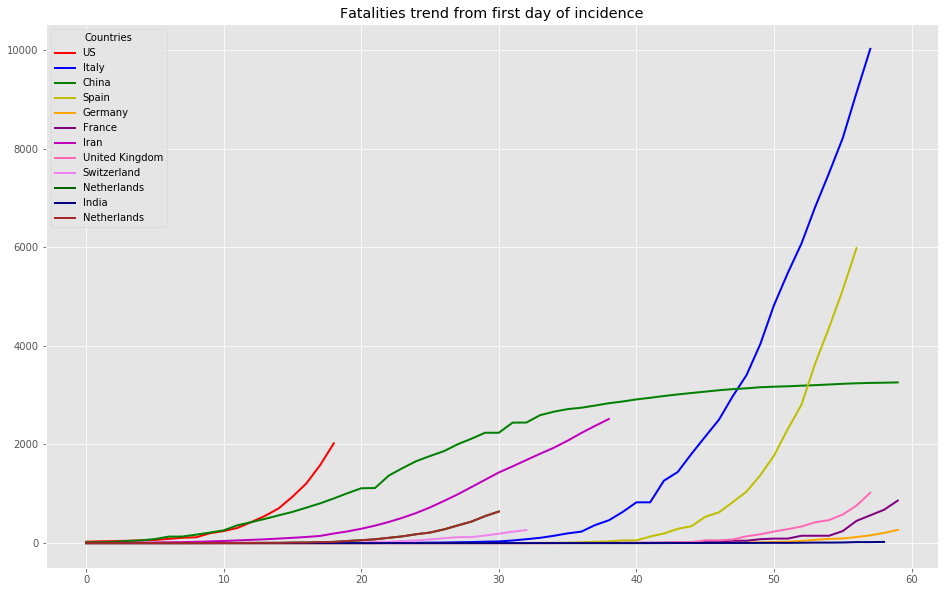

In [22]:
plt.figure(figsize=(16,10))
plt.title('Fatalities trend from first day of incidence')
for i,country in enumerate(list_countries):
    fatal_group=train_df[(train_df['Country_Region']==country)&train_df['ConfirmedCases']!=0].groupby('Date').agg({'Fatalities':['sum']})
    fatal_value=[j for j in fatal_group.Fatalities['sum'].values]
    plot_value=fatal_value[0:60]
    plt.plot(plot_value,color=colors[i],label=country,lw=2)
    plt.legend(title='Countries')

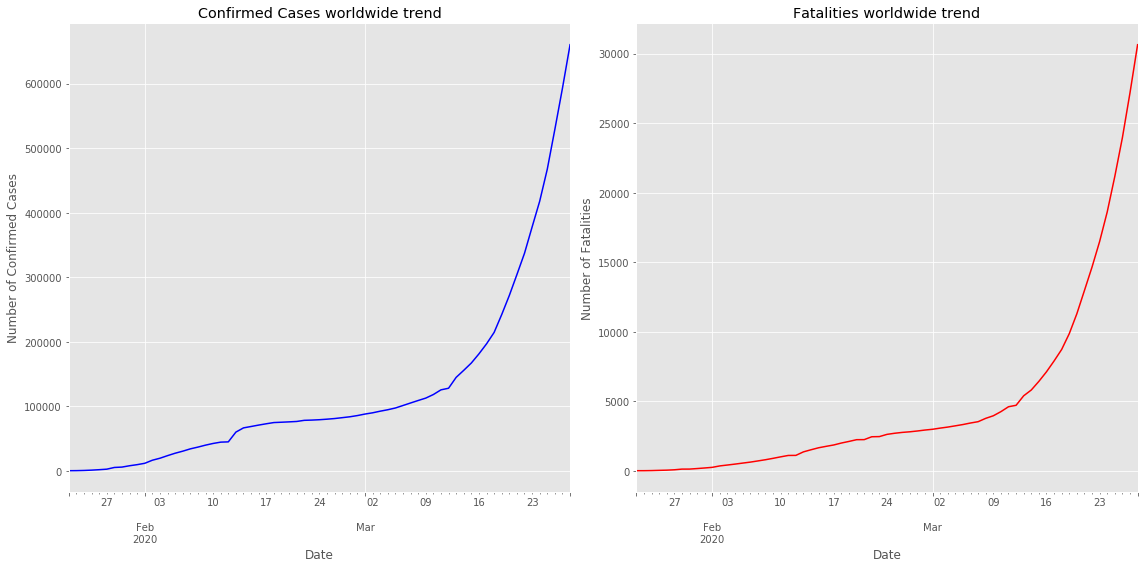

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train_df.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.title('Confirmed Cases worldwide trend')

plt.subplot(1,2,2)
train_df.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend")

plt.tight_layout()

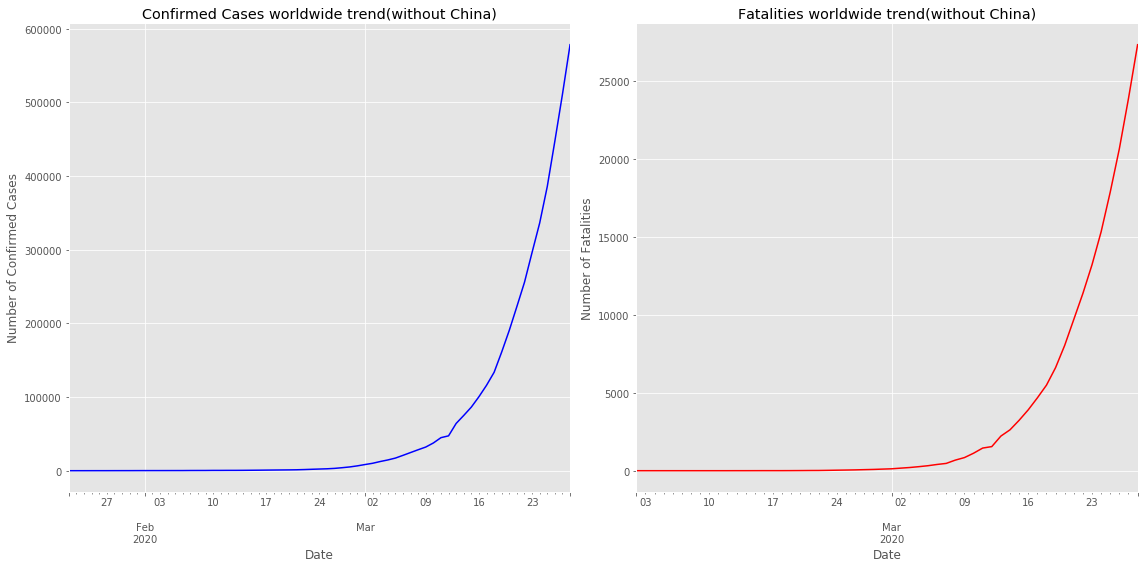

In [24]:
# Confirmed Cases and Fatalities without China's data
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
train_df[(train_df['Country_Region']!='China')&(train_df['ConfirmedCases']!=0)].groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.title('Confirmed Cases worldwide trend(without China)')

plt.subplot(1,2,2)
train_df[(train_df['Country_Region']!='China')&(train_df['Fatalities']!=0)].groupby('Date')['Fatalities'].sum().plot(color='red')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend(without China)")
plt.tight_layout()


*Observation*:

1. China is the major sufferer and has been prime victime of Covid-19,and has first confirmed case in December. Since this dataset has data from 22 January onwards, number of confirmed cases by then reached was 533. *Italy on the other hand confirmed its first 2 cases on 31 January 2020- a month later than China and it took nearly 26 days from that day to reach incidence of 453 Confirmed Cases. Since, number of confirmed cases has increased by nearly 21% on day to day basis.

2. On the other hand, USA has quite early confirmation of first report of CoronaVirus which was probably from a traveller from China to USA in early January. By 24th February, US had 36 cases and reached 400+ cases by 12 March. Since, then number of confirmed cases rose significantly in US. The number of confirmed cases in US is increasing by average of 50% every day.

3. Netherlands has a very different trajectory. Netherland has its first confirmed case of 27 February 2020. This date is very very late as compared to earlier confirmation period from US and Italy. However, it took just 12 days for US to cross 500 confirmed cases. This is major loophole indication in Netherland surveillance system. Number of Confirmed cases in Netherlands is also increasing by average of 20%.

4. India on the other hand, detected its forst case on 30 January 2020 which is quite close to first confirmed case detection in Italy. However, its 500th case confirmed on 24 March 2020. There might be various reasons for this which is unconfirmed but are probably:
                         * Less number of tests
                         * Poor surveillance and detection
                         * Less number of arrival from infected persons
                         * Better control mechanism
                         
5. Overall exponential curve is visible with or without china's data. China's new confirmed cases has been low which according to its state agencies and WHO is because of strict enforcement of social distancing. But, number of cases are increasing cumulatively around the globe exponentially.

6. Though, there is a huge variation in Rate of increase in number of new cases reporting on daily basis. The stark contrast comes in term of China which reported highest number of new cases reporting i.e. 15079 on 13 February 2020 and suddenly new cases reporting decreased to 6415 on 14 February 2020. Since, the number of case increase was on average was 40%. Sudden decrease of new case reporting since then by 57% is a strange phenomenon. It might be because of floowing hypothesis according to my understanding:

                         * Citywide lockdown imposed in Wuhan on 22 January started showing its impact                                    and China succeedeed in containing Virus. This has an assumption that   
                            spread before from virus was not contious and China tracked every infected 
                            patient.
                         * China has stopped reporting actual infected numbers. Real time tracking was 
                           curbed.

7. Comparing graph of confirmed cases shows a similar picture with average of 20% increase in new patients daily, as compared to US which showed sudden increase.

# Geographical Representation of Cases

In [25]:
countries=train_df['Country_Region'].unique()

In [26]:
country_list=[]
confirmation_list=[]
list_fatality=[]
for country in countries:
    country_list.append(country)
    confirm_country=train_df[train_df.Country_Region==country].groupby('Date')['ConfirmedCases'].sum().max()
    confirmation_list.append(confirm_country)
    fatal_country=train_df[train_df.Country_Region==country].groupby('Date')['Fatalities'].sum().max()
    list_fatality.append(fatal_country)
max_dict={'Country':country_list,'ConfirmedCases':confirmation_list,'Fatalities':list_fatality}
map_df=pd.DataFrame.from_dict(max_dict)

In [27]:
map_df

,Country,ConfirmedCases,Fatalities
0,Afghanistan,110.0,4.0
1,Albania,197.0,10.0
2,Algeria,454.0,29.0
3,Andorra,308.0,3.0
4,Angola,5.0,0.0
...,...,...,...
168,Uzbekistan,104.0,2.0
169,Venezuela,119.0,2.0
170,Vietnam,174.0,0.0
171,Zambia,28.0,0.0


In [28]:
code_df=pd.read_csv('country-codes.csv')

In [29]:
code_df=code_df[['ISO3166-1-Alpha-3','CLDR display name']]

In [30]:
map_df=map_df.merge(code_df,left_on='Country',right_on='CLDR display name')

In [31]:
map_df.drop('CLDR display name',axis=1,inplace=True)

In [32]:
map_df.rename(columns={'ISO3166-1-Alpha-3':'Country Code'},inplace=True)

In [33]:

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

data=go.Choropleth(
    locations=map_df['Country Code'], # Spatial coordinates
    z = map_df['ConfirmedCases'], # Data to be color-coded,
    colorscale = 'Reds',
    text=map_df['Country'],
    colorbar_title = "Number of Confirmed Cases",)

fig=go.Figure(data)

fig.update_layout(
    title='Covid-19 Confirmed Cases',
           geo=dict(showframe=False,
                   projection={'type':'robinson'}))


iplot(fig)

# Feature Transformation

In [34]:
test_df['Date']=pd.to_datetime(test_df['Date'])

In [35]:
test_df['Province_State']=test_df.drop('Province_State',axis=1)

In [36]:
train_df=train_df.reset_index()

In [37]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
train_df['Country_Region']=LE.fit_transform(train_df['Country_Region'])
test_df['Country_Region']=LE.transform(test_df['Country_Region'])

train_df.loc[:, 'Date'] = train_df.Date.dt.strftime("%m%d")
train_df["Date"]  = train_df["Date"].astype(int)

test_df.loc[:, 'Date'] = test_df.Date.dt.strftime("%m%d")
test_df["Date"]  = test_df["Date"].astype(int)

In [38]:
#Select feature column names and target variable we are going to use for training
features=['Date','Country_Region']
target = 'ConfirmedCases'

#This is input which our classifier will use as an input.
train_df[features].head(10)

,Date,Country_Region
0,122,0
1,123,0
2,124,0
3,125,0
4,126,0
5,127,0
6,128,0
7,129,0
8,130,0
9,131,0


# Confirmed Cases

In [39]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100, max_samples=0.8,
                        random_state=1)
# We train model
rfcla.fit(train_df[features],train_df[target])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [40]:
#Make predictions using the features from the test data set
predictions = rfcla.predict(test_df[features])

predictions

array([22., 24., 24., ...,  7.,  7.,  7.])

# Fatalities

In [41]:
target2='Fatalities'

In [42]:
# We define the model
rfcla2 = RandomForestClassifier(n_estimators=100, max_samples=0.8,
                        random_state=1)
# We train model
rfcla2.fit(train_df[features],train_df[target2])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [43]:
#Make predictions using the features from the test data set
predictions2 = rfcla2.predict(test_df[features])

print(predictions2[0:50])

[0. 0. 0. 1. 1. 1. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 2. 2. 2. 4.
 5. 5.]


# Submission

In [44]:
#Create a  DataFrame
submission = pd.DataFrame({'ForecastId':test_df['ForecastId'],'ConfirmedCases':predictions,'Fatalities':predictions2})
                        

#Visualize the first 10 rows
submission.head(10)

,ForecastId,ConfirmedCases,Fatalities
0,1,22.0,0.0
1,2,24.0,0.0
2,3,24.0,0.0
3,4,40.0,1.0
4,5,40.0,1.0
5,6,74.0,1.0
6,7,84.0,2.0
7,8,94.0,4.0
8,9,110.0,4.0
9,10,110.0,4.0


In [45]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
